# Part II - DATA ANALYSIS ON THE PISA DATASET
## by (Igweze Ifeanyi)

## Investigation Overview

> From my EDA I uncovered what I choose to call an anomaly, the fact though students perfom better with their parents, the more time they spend the less their scores are. Due to the negative correlation I choose to focus my slides on this, showing a bivariate and multivariate visualization demonstrating the relationship between the variables.

## Dataset Overview

> This is a dataset which examines how well students have learned the school curricullum and how well prepared they are for life beyond school, all from 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy. During wrangling I removed null values, took away columns I had no use of, renamed some columns, calculated and created the average column etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the wrangled and cleaned dataset into a pandas dataframe
df = pd.read_csv('df_cleaned.csv')
df.head()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Study Time With Parent,Parents Highest Education,Immigration Status,Parents Presence,Average Score
0,1,2,Female,Albania,486.1427,406.2936,548.9929,0,"ISCED 5A, 6",Native,Both,480.476400
1,2,3,Female,Albania,533.2684,401.2100,499.6643,2,"ISCED 5A, 6",Native,Both,478.047567
2,3,4,Female,Albania,412.2215,547.3630,438.6796,0,"ISCED 5A, 6",Native,Both,466.088033
3,5,6,Female,Albania,396.3312,378.2544,384.3156,1,"ISCED 3B, C",Native,Both,386.300400
4,6,7,Female,Albania,438.0823,373.2503,508.1499,0,"ISCED 5A, 6",Native,Both,439.827500


## (Visualization 1)

### How much time does the parent spend working with the student?

Here I wanted to know how much time parents give their children, as it may lead to better scores.

**Inference:**
1. Though a good amount of students work with their parents at their own rates, a vast majority of students do not work withtheir parents.

2. Some students work as much as 30 hours with their parents.

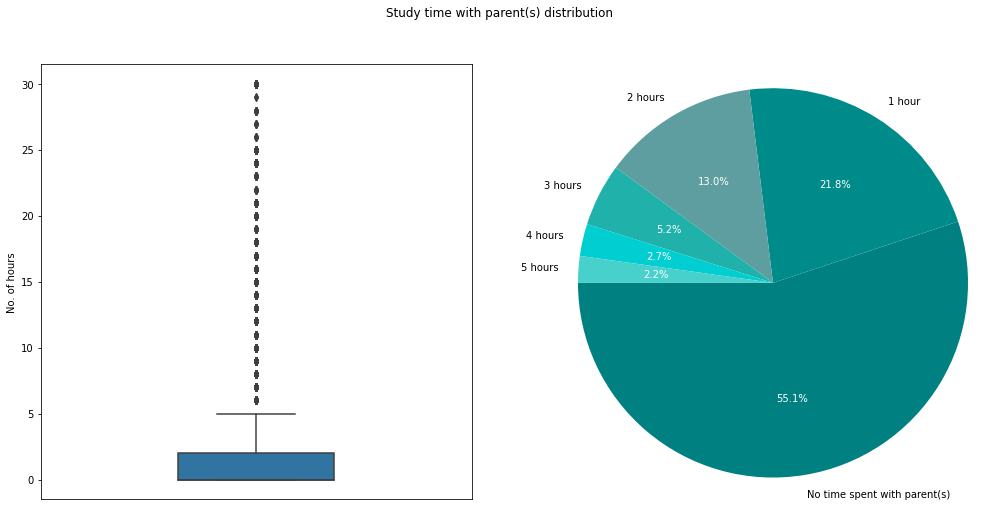

In [4]:
fig1, ax1 = plt.subplots(1, 2, figsize=(17, 8), sharex=True)

sb.boxplot(y=df['Study Time With Parent'], ax=ax1[0]);
ax1[0].set(ylabel='No. of hours')

five = df[df['Study Time With Parent'] < 6]['Study Time With Parent'].value_counts()

patches, texts, autotexts = ax1[1].pie(five, 
                                    colors = ['#008080','#008B8B','#5F9EA0','#20B2AA','#00CED1','#48D1CC'],
                                    labels=['No time spent with parent(s)', '1 hour', '2 hours', '3 hours', '4 hours', '5 hours'], 
                                    autopct='%1.1f%%',
                                    startangle=180
                                   );   
for text in autotexts:
    text.set_color('white')
ax1[1].axis('equal');

plt.suptitle('Study time with parent(s) distribution')
plt.show();

## (Visualization 2)

### Parent Presence vs Score

Then I went further to chech whether students perform better having both parents or just a single parent.

**Inference:**
1. Compared to those of students living with two parents, the scores of students living with a single parent is significanlty less (by about 20 points).

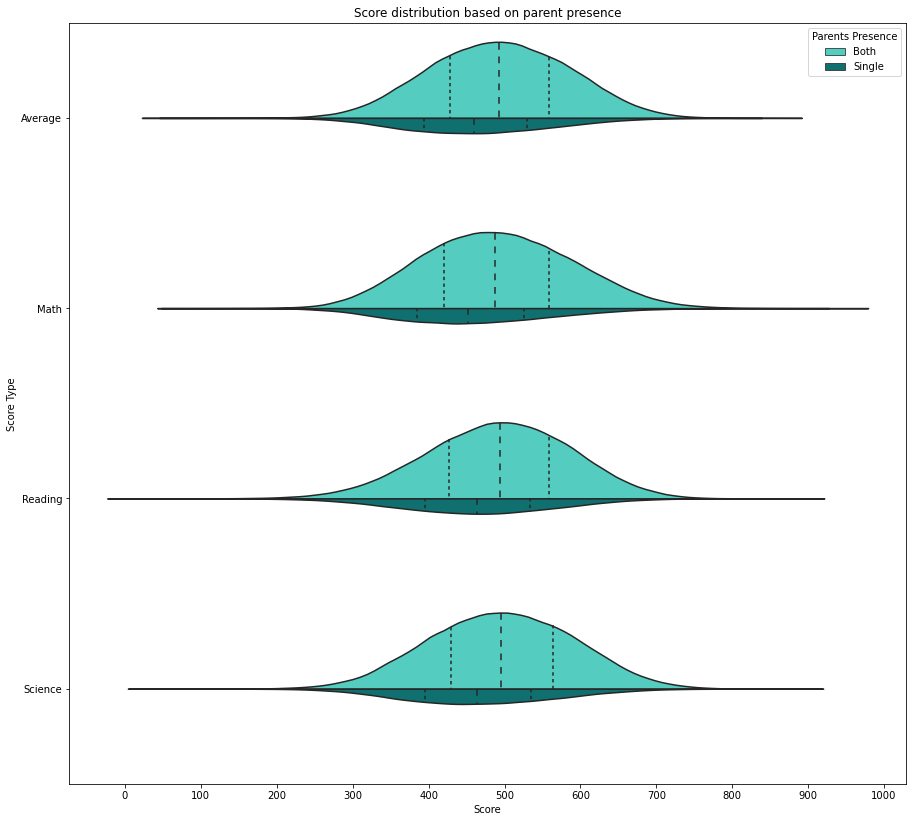

In [5]:
data = pd.melt(df, id_vars=['Student Id', 'Gender', 'Country', 'Study Time With Parent', 'Parents Highest Education', 'Immigration Status', 'Parents Presence'], 
               value_vars=['Average Score','Math Score','Reading Score','Science Score'], 
               var_name="Score Type", value_name='Score')
data['Score Type'] = data['Score Type'].replace('Average Score', 'Average').replace('Math Score','Math').replace('Reading Score','Reading').replace('Science Score','Science')

palette = ["#40E0D0", "#008080"]

plt.figure(figsize = [15, 14])
ax = sb.violinplot(x = 'Score', y='Score Type', hue='Parents Presence',
                   data=data, palette=palette, split=True,
                   scale="count", inner="quartile");

x_ticks = np.arange(0, 1000 + 1, 100)
plt.xticks(x_ticks, x_ticks);
plt.title("Score distribution based on parent presence");

## (Visualization 3)

### Parents presence vs Score vs Time spent with parents

To confirm and accurately postulate students perform better with attention from both parents, I decided to analyse all variables in the same visualization.

**Inference:**
From this plot we clearly see the negative impact of time spent studying with parents on student scores, with greater impact on those with two parents. This just showed that truly things are not as they seem and variables need indepth analysis before a conclusion should be drawn.

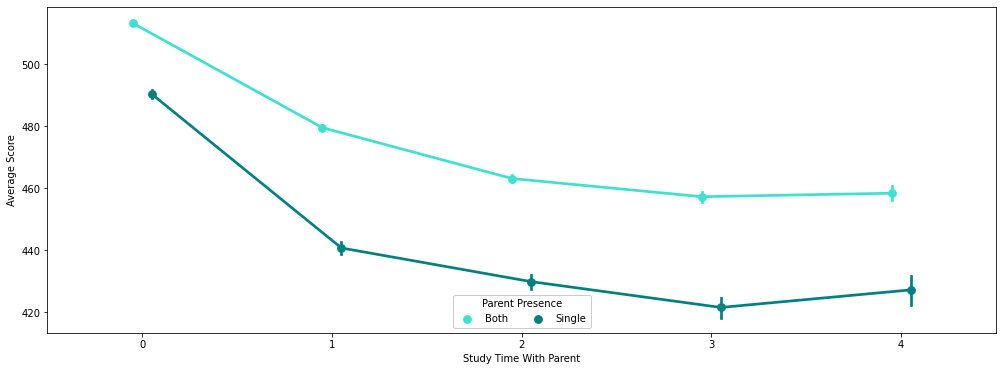

In [6]:
plt.figure(figsize = [17, 6])

ax = sb.pointplot(data = df[df['Study Time With Parent'] < 5], 
                  x = 'Study Time With Parent', y = 'Average Score', hue = 'Parents Presence',
                  dodge = 0.1, palette = ["#40E0D0", "#008080"]
                 )
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Parent Presence');

In [11]:
!jupyter nbconvert <Part_II_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 